## 3. Getting Started with Neural Networks

### Building an Image Classifier using Keras & the Sequential API
In the **fashion** problem, we want to classify the image of an item to one of 10 different classes. It is a multiclasss classification problem, the same as the **reuters** problem.

In [1]:
from keras.datasets import fashion_mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras as tf_keras

Using TensorFlow backend.


In [2]:
##########
# Ingestion
##########
(train_data_full, train_labels_full), (test_data, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot',]
DIMENSION_LENGTH, DIMENSION_HEIGHT = train_data_full.shape[1], train_data_full.shape[2]
DIMENSION_SIZE = train_data_full.shape[1] * train_data_full.shape[2]

The fashion dataset contains 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [3]:
# For testing
# print([td[:15] for td in train_data_full[0:3]])
# print([class_names[i] for i in train_labels_full[0:3]])

Preprocessing steps are:

1. scale pixel intensities down by dividing them by 255.0 (and also converts them to floats.

In [4]:
##########
# Preprocessing for training
##########
x_train = train_data_full/255.0
x_train__train, x_train__val = x_train[5000:], x_train[:5000]
y_train__train, y_train__val = train_labels_full[5000:], train_labels_full[:5000]

### Tensorflow Implementation

We now implement the workflow using `tf.keras`.

In [5]:
##########
# Model I: Instantiate Model
##########
modeli = tf_keras.models.Sequential([
    tf_keras.layers.Flatten(input_shape=(DIMENSION_LENGTH, DIMENSION_HEIGHT)),
    tf_keras.layers.Dense(300, activation='relu', input_shape=(DIMENSION_SIZE,)),
    tf_keras.layers.Dense(100, activation='relu'),
    tf_keras.layers.Dense(10, activation='softmax'),
])

In [6]:
##########
# Model I: Train / Model Tuning
##########
modeli.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = modeli.fit(x_train__train, y_train__train, 
                    epochs=30, batch_size=128, 
                    validation_data=(x_train__val, y_train__val),
                    verbose=0)

In [7]:
# For testing: Get the properties of the model
modeli.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


You can see from here a dense network has many parameters. The first hidden layer has $784 \times 300$ connection weights, and another $300$ bias terms, adding up to $235500$ parameters. This gives the model a lot of flexibility to fit the training data but can also lead to overfitting.

In [8]:
# For testing: Get the weights of the first hidden layer
w1, b1 = modeli.layers[1].get_weights() # Note: there is also a set_weights() function
print(w1.shape)
# print(w1[:5])
print(b1.shape)
# print(b1[:5])

(784, 300)
(300,)


In [9]:
# For testing: The layers
print(modeli.layers)
print()
print(modeli.layers[1].name)

[<tensorflow.python.keras.layers.core.Flatten object at 0x1391e84a8>, <tensorflow.python.keras.layers.core.Dense object at 0x13921b048>, <tensorflow.python.keras.layers.core.Dense object at 0x13921b2b0>, <tensorflow.python.keras.layers.core.Dense object at 0x13921b518>]

dense


Let's plot the training loss and accuracy curve.

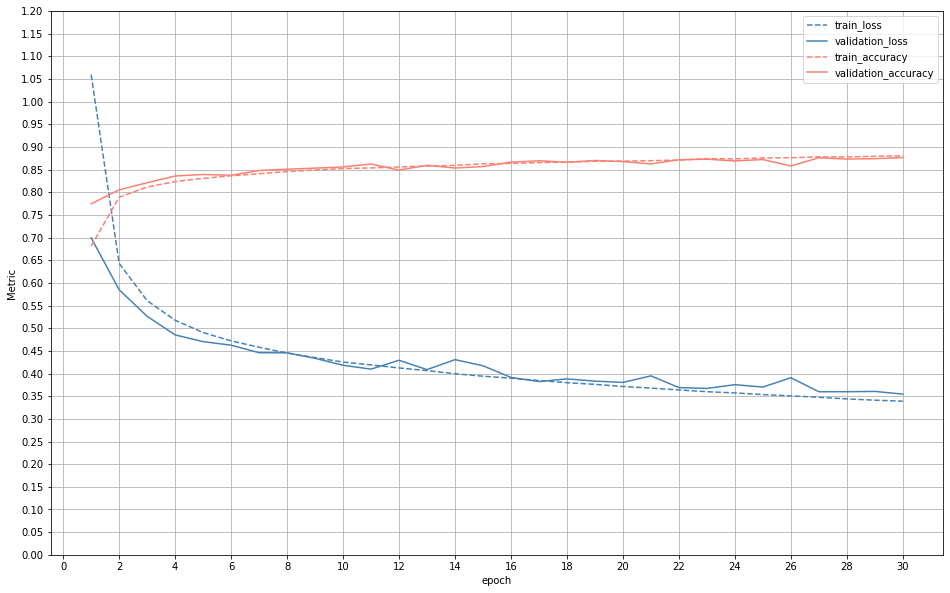

In [10]:
metrics_df = pd.DataFrame(history.history)
metrics_df['epoch'] = metrics_df.index+1

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(1,1,1)
metrics_df.plot(kind='line', x='epoch', y='loss', ax=ax1, label='train_loss', style='--', color='steelblue')
metrics_df.plot(kind='line', x='epoch', y='val_loss', ax=ax1, label='validation_loss', color='steelblue')
metrics_df.plot(kind='line', x='epoch', y='accuracy', ax=ax1, label='train_accuracy', style='--', color='salmon')
metrics_df.plot(kind='line', x='epoch', y='val_accuracy', ax=ax1, label='validation_accuracy', color='salmon')
ax1.set_ylabel("Metric")
ax1.grid('GAINSBORO')
ax1.set_xticks(range(0,31,2))
ax1.set_ylim(0,1.2)
ax1.set_yticks([r/20 for r in list(range(0,25,))])
plt.show()

Let's use 13 epochs for the final model.

In [11]:
##########
# Train Tuned Model
##########
modeli2 = tf_keras.models.Sequential([
    tf_keras.layers.Flatten(input_shape=(DIMENSION_LENGTH, DIMENSION_HEIGHT)),
    tf_keras.layers.Dense(300, activation='relu', input_shape=(DIMENSION_SIZE,)),
    tf_keras.layers.Dense(100, activation='relu'),
    tf_keras.layers.Dense(10, activation='softmax'),
])

modeli2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modeli2.fit(x_train__train, y_train__train, 
           epochs=13, batch_size=128, 
           validation_data=(x_train__val, y_train__val),
           verbose=0)

In [12]:
##########
# Preprocessing for test set
##########
x_test = test_data/255.0

##########
# Evaluate on Test Set
##########
results = modeli2.evaluate(x_test, test_labels)
print(results)

313/313 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8441
[0.4381150007247925, 0.8440999984741211]


In [13]:
##########
# Predict
##########

# Using probability
print("PROBABILITY:")
prediction_probs = modeli2.predict(x_test)
print(prediction_probs[0])
print(np.argmax(prediction_probs[0])) # sums to 1
print()
# Using class
print("CLASS:")
prediction_classes = np.argmax(modeli2.predict(x_test), axis=-1)
print(prediction_classes[0])
print(class_names[prediction_classes[0]])

PROBABILITY:
[3.2349773e-05 3.5801120e-06 2.3825829e-05 2.8376075e-05 3.8681751e-06
 1.4062324e-01 5.8557875e-05 1.2583052e-01 3.2516490e-03 7.3014408e-01]
9

CLASS:
9
Ankle boot
